In [55]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

In [56]:
from sklearn.model_selection import train_test_split

### Pré-Processamento e visualização das Imagens

In [57]:
def carregar_imagens(caminho, tamanho=(64,64)):
    imagens = []
    labels = []
    for pasta in os.listdir(caminho):
        classe = os.path.basename(pasta)
        for arquivo in os.listdir(os.path.join(caminho, pasta)):
            imagem = cv2.imread(os.path.join(caminho, pasta, arquivo))
            imagem = cv2.resize(imagem, tamanho)
            imagens.append(imagem)
            labels.append(int(classe))
    return np.array(imagens) / 255.0 , np.array(labels)

In [143]:
caminho = "./dataset"
imagens, labels = carregar_imagens(caminho)

In [144]:
imagens_treino, imagens_teste, labels_treino, labels_teste = train_test_split(imagens, labels, test_size=0.3, random_state=45)

In [145]:
np.savez('dataset.npz', imagens_treino=imagens_treino, labels_treino=labels_treino, imagens_teste=imagens_teste, labels_teste=labels_teste)

### Carregando os Dados

In [146]:
data = np.load('dataset.npz')
imagens_treino = data['imagens_treino']
labels_treino = data['labels_treino']
imagens_teste = data['imagens_teste']
labels_teste = data['labels_teste']

In [62]:
nomes_classes = ['Não é uma pessoa', 'pessoa']

In [147]:
print(imagens_teste)

[[[[0.59607843 0.54117647 0.47058824]
   [0.61960784 0.56470588 0.49411765]
   [0.61568627 0.56078431 0.49019608]
   ...
   [0.61960784 0.56078431 0.48627451]
   [0.61176471 0.55294118 0.47843137]
   [0.60784314 0.54901961 0.4745098 ]]

  [[0.6        0.54901961 0.4745098 ]
   [0.61176471 0.56078431 0.48627451]
   [0.61960784 0.56470588 0.49411765]
   ...
   [0.61568627 0.56862745 0.51372549]
   [0.67058824 0.61960784 0.58039216]
   [0.61176471 0.55686275 0.48627451]]

  [[0.61568627 0.56078431 0.49019608]
   [0.63137255 0.57647059 0.50588235]
   [0.6        0.54509804 0.47058824]
   ...
   [0.64705882 0.61568627 0.58823529]
   [0.63137255 0.59607843 0.55686275]
   [0.62352941 0.58823529 0.54901961]]

  ...

  [[0.01176471 0.04313725 0.01568627]
   [0.16470588 0.28627451 0.23921569]
   [0.06666667 0.10588235 0.05882353]
   ...
   [0.02745098 0.09019608 0.0745098 ]
   [0.08235294 0.17254902 0.21176471]
   [0.14901961 0.24313725 0.27058824]]

  [[0.04705882 0.10588235 0.04705882]
   [0.0

In [64]:
from PIL import Image

In [148]:
labels_teste.shape

(81,)

In [149]:
labels_teste

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
def visualiza_imagens(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

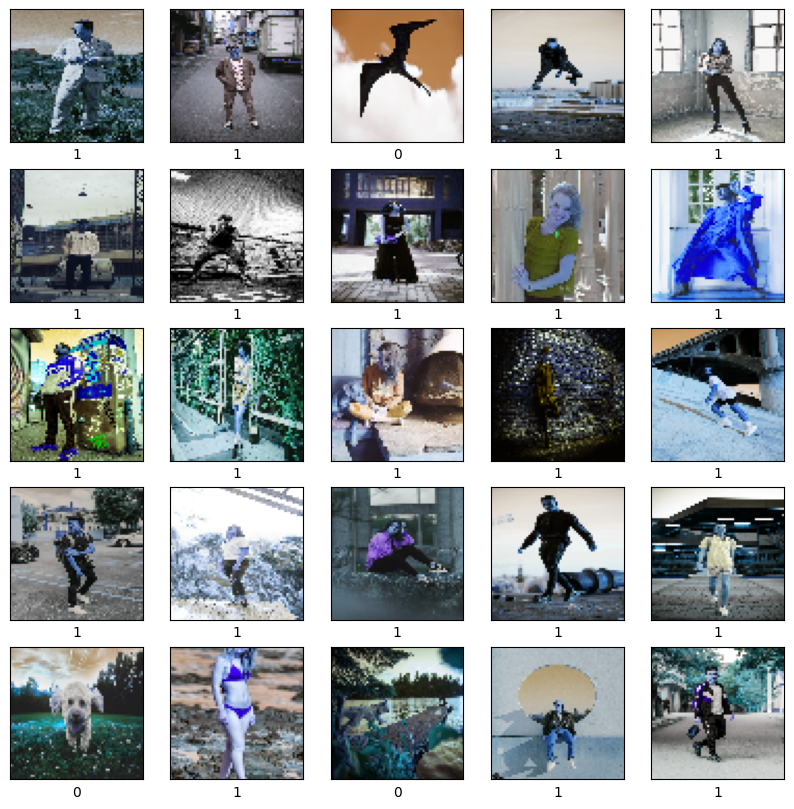

In [150]:
visualiza_imagens(imagens_teste, labels_teste)

### Construção do Modelo

In [126]:
# Modelo

# Criar o objeto de sequência de camadas
modelo = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,3))) # (32,32) é os pixel da imagem e o 3 é o rgb
modelo.add(layers.MaxPooling2D((2,2)))

# Adicionando o segundo bloco de convolução e max pooling (camada intermediária)
modelo.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
modelo.add(layers.MaxPooling2D((2,2)))

modelo.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
modelo.add(layers.MaxPooling2D((2,2)))

modelo.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
modelo.add(layers.MaxPooling2D((2,2)))

modelo.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
modelo.add(layers.MaxPooling2D((2,2)))




In [127]:
modelo.add(layers.Flatten())
modelo.add(layers.Dense(128, activation='relu'))
modelo.add(layers.Dense(2, activation='softmax'))

In [128]:
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 8, 8, 64)         

In [129]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [151]:
%%time
history = modelo.fit(imagens_treino,
                    labels_treino,
                    epochs=20,
                    validation_data=(imagens_teste, labels_teste))

Epoch 1/20
6/6 [==============================] - 1s 104ms/step - loss: 0.6384 - accuracy: 0.8763 - val_loss: 1.0836 - val_accuracy: 0.8395
Epoch 2/20
6/6 [==============================] - 1s 92ms/step - loss: 0.4373 - accuracy: 0.8602 - val_loss: 0.4527 - val_accuracy: 0.8519
Epoch 3/20
6/6 [==============================] - 1s 91ms/step - loss: 0.3760 - accuracy: 0.7742 - val_loss: 0.3802 - val_accuracy: 0.8642
Epoch 4/20
6/6 [==============================] - 1s 92ms/step - loss: 0.2784 - accuracy: 0.8710 - val_loss: 0.3613 - val_accuracy: 0.8765
Epoch 5/20
6/6 [==============================] - 1s 92ms/step - loss: 0.2277 - accuracy: 0.9140 - val_loss: 0.3372 - val_accuracy: 0.8395
Epoch 6/20
6/6 [==============================] - 1s 103ms/step - loss: 0.1625 - accuracy: 0.9462 - val_loss: 0.3373 - val_accuracy: 0.8642
Epoch 7/20
6/6 [==============================] - 1s 94ms/step - loss: 0.1084 - accuracy: 0.9570 - val_loss: 0.3733 - val_accuracy: 0.8395
Epoch 8/20
6/6 [=========

### Avaliação do Modelo

In [74]:
def prever(predict):
    classe_prevista = np.argmax(predict)
    return nomes_classes[classe_prevista]

In [152]:
erro_teste, acc_teste = modelo.evaluate(imagens_teste, labels_teste, verbose = 2)

3/3 - 0s - loss: 0.6637 - accuracy: 0.8272 - 51ms/epoch - 17ms/step


In [153]:
print('\nAcurácia com Dados de Teste:', acc_teste)


Acurácia com Dados de Teste: 0.8271604776382446


In [77]:
def previl_image(image):
    imagem_verifica = Image.open(image)
    imagem_verifica = imagem_verifica.resize((64,64))
    plt.figure(figsize = (1,1))
    plt.imshow(imagem_verifica)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print(imagem_verifica.size)
    imagem_verifica_np = np.array(imagem_verifica) / 255.0
    imagem_verifica_np = np.expand_dims(imagem_verifica_np, axis=0)

    predict = modelo.predict(imagem_verifica_np)
    print(predict)
    return prever(predict)

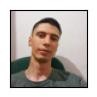

(64, 64)
1/1 [==============================] - 0s 20ms/step
[[0.00617812 0.99382186]]


'pessoa'

In [159]:
previl_image("/home/mateus/Imagens/file.jpeg")

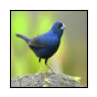

(64, 64)
1/1 [==============================] - 0s 14ms/step
[[9.9982977e-01 1.7016729e-04]]


'Não é uma pessoa'

In [155]:
previl_image("/home/mateus/Imagens/Tiziu.jpg")

6/6 [==============================] - 0s 17ms/step


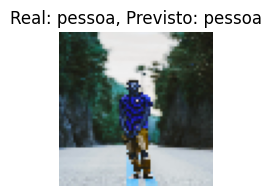

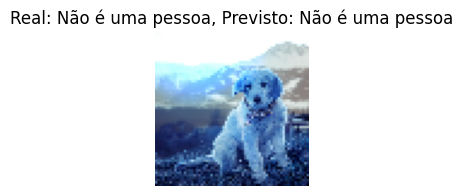

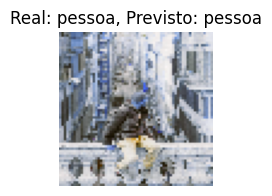

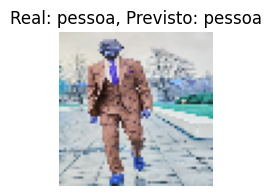

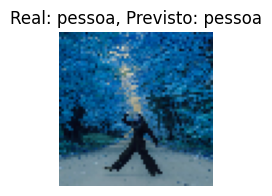

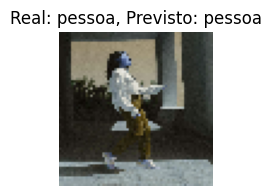

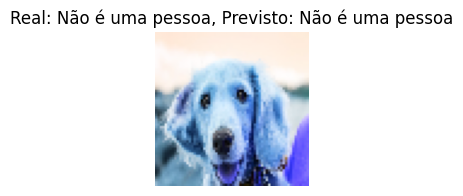

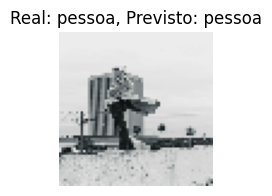

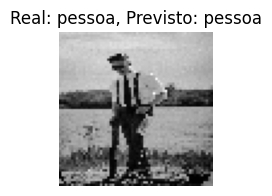

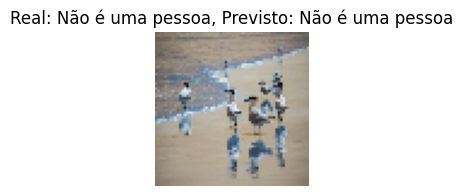

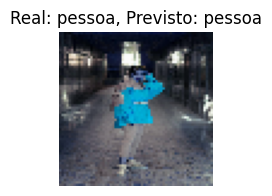

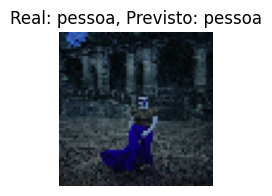

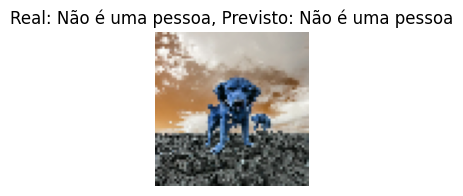

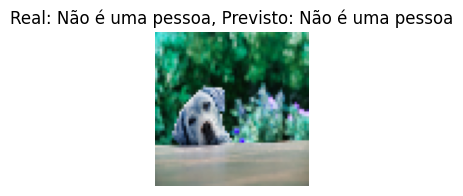

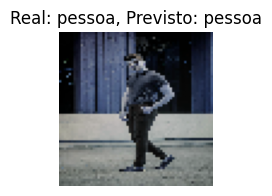

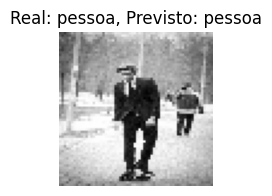

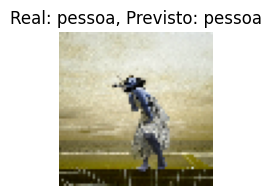

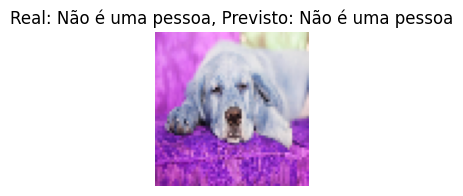

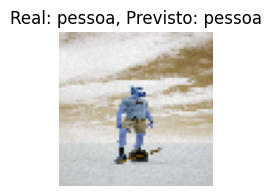

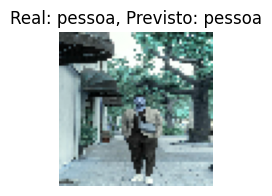

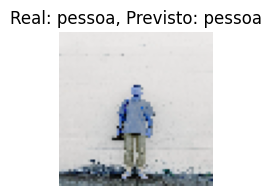

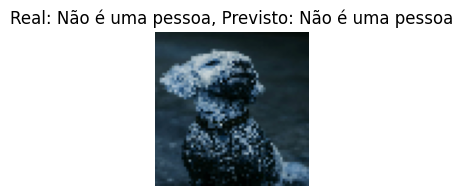

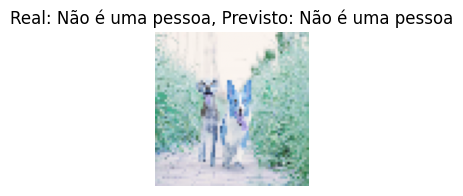

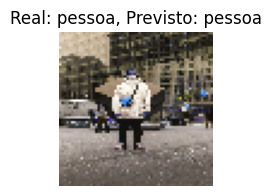

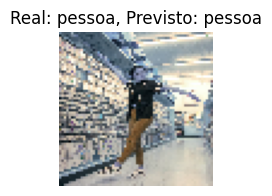

In [156]:
previsoes_treino = modelo.predict(imagens_treino)

# Mostrando os resultados das previsões
for i in range(25):
    imagem = imagens_treino[i]
    label_real = labels_treino[i]
    label_prevista = np.argmax(previsoes_treino[i])
    classe_prevista = nomes_classes[label_prevista]
    
    plt.figure(figsize=(2, 2))
    plt.imshow(imagem)
    plt.title(f'Real: {nomes_classes[label_real]}, Previsto: {classe_prevista}')
    plt.axis('off')
    plt.show()

In [142]:
modelo.save("modelo")

INFO:tensorflow:Assets written to: modelo/assets


INFO:tensorflow:Assets written to: modelo/assets
